# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities



Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = base_url + "appid=" + weather_api_key + "&units="+"imperial"+"&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | san quintin
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | santa rosa
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | erdenet
Processing Record 11 of Set 1 | waingapu
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | valparaiso
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | east london
Processing Record 19 of Set 1 | kachug
Processing Record 20 of Set 1 | adrar
Processing Record 21 of Set 1 | katsuura
Processing Record 22 of Set 1 | 

Processing Record 37 of Set 4 | orcopampa
Processing Record 38 of Set 4 | tazmalt
Processing Record 39 of Set 4 | leh
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 43 of Set 4 | tuatapere
Processing Record 44 of Set 4 | paranhos
Processing Record 45 of Set 4 | praia da vitoria
Processing Record 46 of Set 4 | anadyr
Processing Record 47 of Set 4 | vilcun
Processing Record 48 of Set 4 | salta
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 0 of Set 5 | khatanga
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | burnie
Processing Record 3 of Set 5 | ulladulla
Processing Record 4 of Set 5 | taoudenni
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | vokhma
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | mbandaka
Processing Record 9 of S

Processing Record 27 of Set 8 | taicheng
Processing Record 28 of Set 8 | zwedru
Processing Record 29 of Set 8 | carutapera
Processing Record 30 of Set 8 | palauig
Processing Record 31 of Set 8 | banda aceh
Processing Record 32 of Set 8 | nunkini
Processing Record 33 of Set 8 | mananjary
Processing Record 34 of Set 8 | krasnoarmeysk
Processing Record 35 of Set 8 | verkhnyaya inta
Processing Record 36 of Set 8 | port hardy
Processing Record 37 of Set 8 | maracacume
Processing Record 38 of Set 8 | campbeltown
Processing Record 39 of Set 8 | kavaratti
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | kiama
Processing Record 42 of Set 8 | kemijarvi
Processing Record 43 of Set 8 | chudovo
Processing Record 44 of Set 8 | quatre cocos
Processing Record 45 of Set 8 | changji
Processing Record 46 of Set 8 | deer lake
Processing Record 47 of Set 8 | placido de castro
Processing Record 48 of Set 8 | iqaluit
Processing Record 49 of Set 8 | alpena
Processing Record 0 of Set 9

Processing Record 16 of Set 12 | copiapo
Processing Record 17 of Set 12 | westerland
Processing Record 18 of Set 12 | japura
Processing Record 19 of Set 12 | teknaf
Processing Record 20 of Set 12 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 12 | obigarm
Processing Record 22 of Set 12 | los llanos de aridane
Processing Record 23 of Set 12 | matara
Processing Record 24 of Set 12 | dolbeau
City not found. Skipping...
Processing Record 25 of Set 12 | ostrovnoy
Processing Record 26 of Set 12 | maues
Processing Record 27 of Set 12 | nizhniy baskunchak
Processing Record 28 of Set 12 | camp verde
Processing Record 29 of Set 12 | manaus
Processing Record 30 of Set 12 | pimentel
Processing Record 31 of Set 12 | alvand
Processing Record 32 of Set 12 | erzin
Processing Record 33 of Set 12 | ketchikan
Processing Record 34 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 12 | fillmore
Processing Record 36 of Set 12 | karakol
Processing Record 37 of Set 12 | p

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,78.04,71,100,21.03,PF,1670074859
1,pangnirtung,66.1451,-65.7125,-4.31,97,99,3.31,CA,1670074859
2,san quintin,30.4833,-115.9500,61.72,64,100,1.50,MX,1670074860
3,santa rosa,14.3122,121.1114,84.11,80,95,9.42,PH,1670074860
4,faanui,-16.4833,-151.7500,80.42,76,99,20.24,PF,1670074860


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("C:\\Users\\M.Sam\\Downloads\\Python APIs\\Starter_Code\\output_data\\cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("C:\\Users\\M.Sam\\Downloads\\Python APIs\\Starter_Code\\output_data\\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,78.04,71,100,21.03,PF,1670074859
1,pangnirtung,66.1451,-65.7125,-4.31,97,99,3.31,CA,1670074859
2,san quintin,30.4833,-115.9500,61.72,64,100,1.50,MX,1670074860
3,santa rosa,14.3122,121.1114,84.11,80,95,9.42,PH,1670074860
4,faanui,-16.4833,-151.7500,80.42,76,99,20.24,PF,1670074860


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

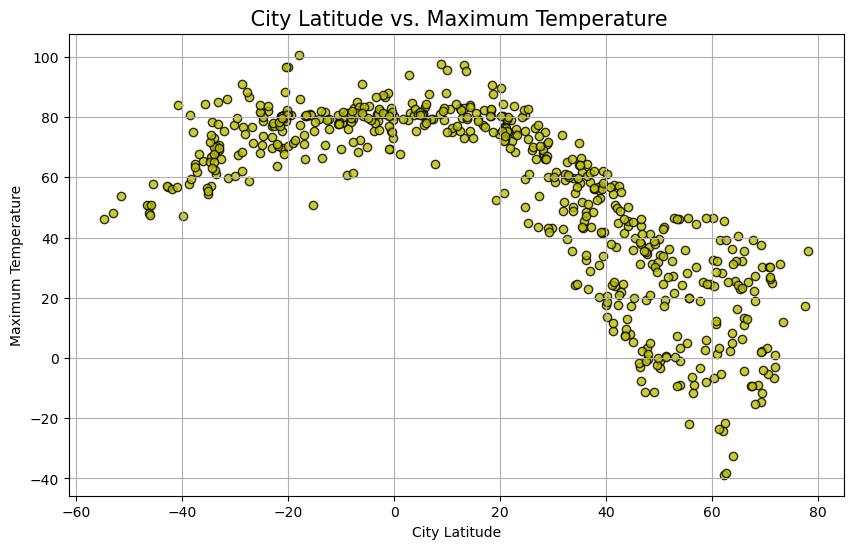

Analysis: scatter plot shows the negative latitude cities (southern hemisphere) have higher temperatures. The plot also shows that temperature drops whilst we move away from the equator.


In [43]:
# Build scatter plot for latitude vs. temperature
x_axis_1 = city_data_df["Lat"]
y_axis_1 = city_data_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_1, y_axis_1, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitude vs. Maximum Temperature",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Maximum Temperature")
plt.grid()
#plt.xlim(0,85)
#plt.ylim(-60,90)

# Save the figure
plt.savefig("C:\\Users\\M.Sam\\Downloads\\Python APIs\\Starter_Code\\output_data\\Fig1.png")

# Show plot
plt.show()

print(f"Analysis: scatter plot shows the negative latitude cities (southern hemisphere) have higher temperatures. The plot also shows that temperature drops whilst we move away from the equator.")


#### Latitude Vs. Humidity

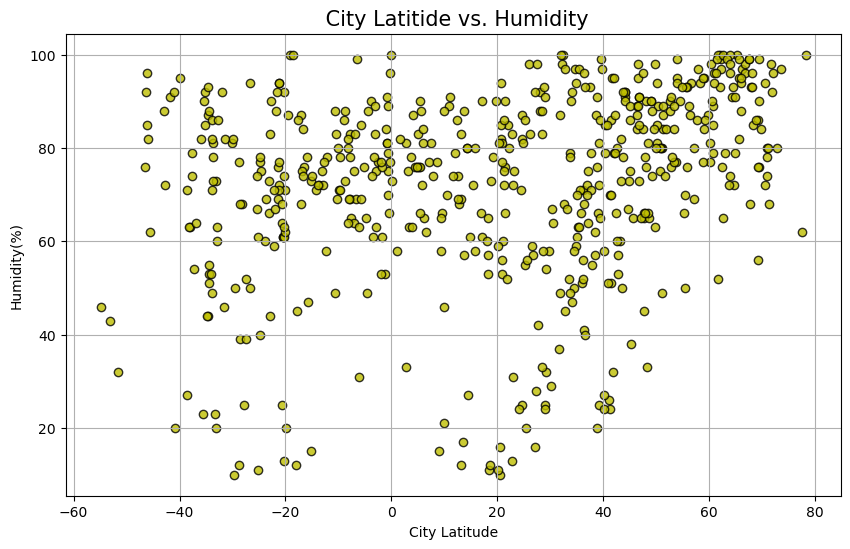

Analysis: scatter plot shows higher latitude cities have higher humidity


In [44]:
# Build the scatter plots for latitude vs. humidity
x_axis_2 = city_data_df["Lat"]
y_axis_2 = city_data_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitide vs. Humidity",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

# Save the figure
plt.savefig("C:\\Users\\M.Sam\\Downloads\\Python APIs\\Starter_Code\\output_data\\Fig2.png")

# Show plot
plt.show()

print(f"Analysis: scatter plot shows higher latitude cities have higher humidity")



#### Latitude Vs. Cloudiness

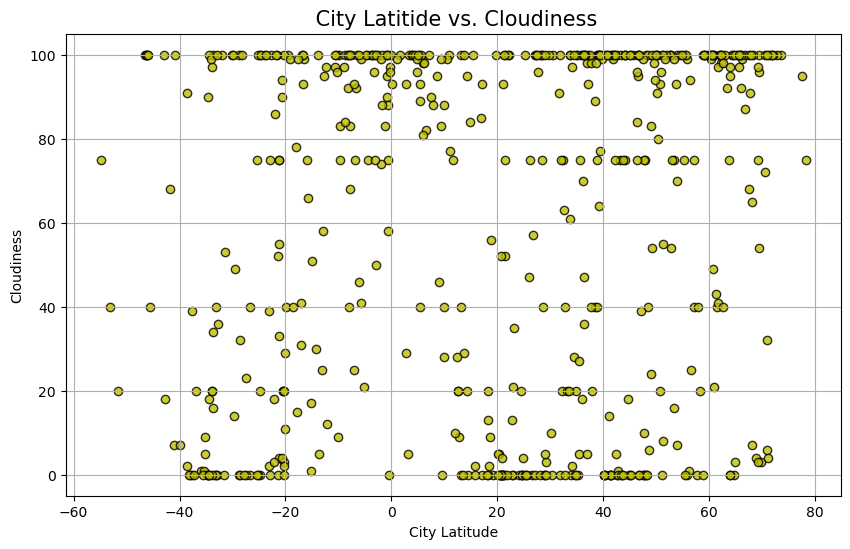

Analysis: The scatter plot shows no pattern between latitude and cloudiness as the plot seems random.


In [45]:

# Build the scatter plots for latitude vs. humidity
x_axis_3 = city_data_df["Lat"]
y_axis_3 = city_data_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_3, y_axis_3, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitide vs. Cloudiness",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("C:\\Users\\M.Sam\\Downloads\\Python APIs\\Starter_Code\\output_data\\Fig3.png")

# Show plot
plt.show()

print(f"Analysis: The scatter plot shows no pattern between latitude and cloudiness as the plot seems random.")


#### Latitude vs. Wind Speed Plot

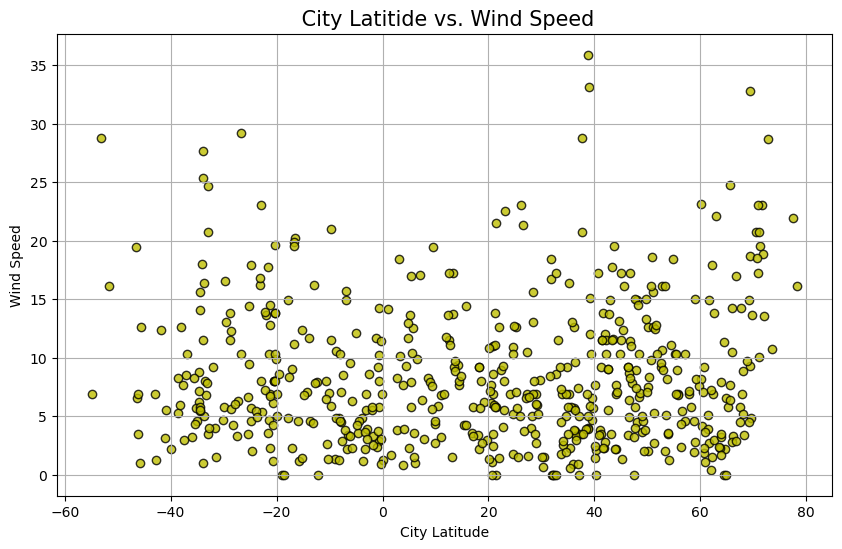

Analysis: The scatter plot shows no pattern between latitude and wind speed as the plot seems random.


In [46]:
# Build the scatter plots for latitude vs. humidity
x_axis_4 = city_data_df["Lat"]
y_axis_4 = city_data_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x_axis_4, y_axis_4, marker="o", facecolors="y", edgecolors="black",
            alpha=0.8);
plt.title( " City Latitide vs. Wind Speed",fontsize = 15)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("C:\\Users\\M.Sam\\Downloads\\Python APIs\\Starter_Code\\output_data\\Fig4.png")

# Show plot
plt.show()

print(f"Analysis: The scatter plot shows no pattern between latitude and wind speed as the plot seems random.")


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pangnirtung,66.1451,-65.7125,-4.31,97,99,3.31,CA,1670074859
2,san quintin,30.4833,-115.9500,61.72,64,100,1.50,MX,1670074860
3,santa rosa,14.3122,121.1114,84.11,80,95,9.42,PH,1670074860
6,nanortalik,60.1432,-45.2371,32.56,81,100,8.16,GL,1670074861
7,erdenet,49.0333,104.0833,-11.31,90,24,3.69,MN,1670074861


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,78.04,71,100,21.03,PF,1670074859
4,faanui,-16.4833,-151.7500,80.42,76,99,20.24,PF,1670074860
5,mataura,-46.1927,168.8643,50.49,96,100,3.47,NZ,1670074861
8,waingapu,-9.6567,120.2641,80.15,71,83,5.86,ID,1670074861
10,valparaiso,-33.0393,-71.6273,69.01,73,40,3.44,CL,1670074801


The r-squared is: 0.6933375321474813


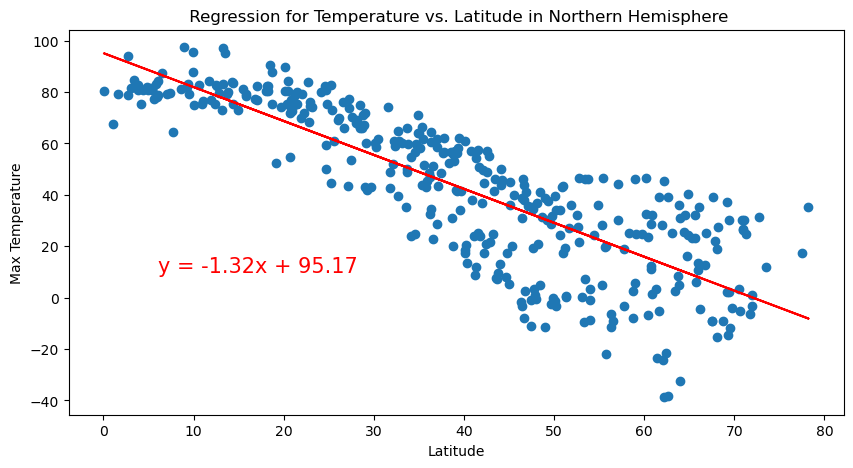

Analysis:The regression plot shows the temperature decreases as the latitudes increase and there is a strong correlation between temperature and latitude in Northern Hemisphere


In [31]:
# Linear regression on Northern Hemisphere
x_axis_5 = northern_hemi_df["Lat"]
y_axis_5 = northern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_5, y_axis_5)
regress_values = x_axis_5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_5,y_axis_5)

# Plot regression line
plt.plot(x_axis_5,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Temperature vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The regression plot shows the temperature decreases as the latitudes increase and there is a strong correlation between temperature and latitude in Northern Hemisphere")

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.35797656933795247


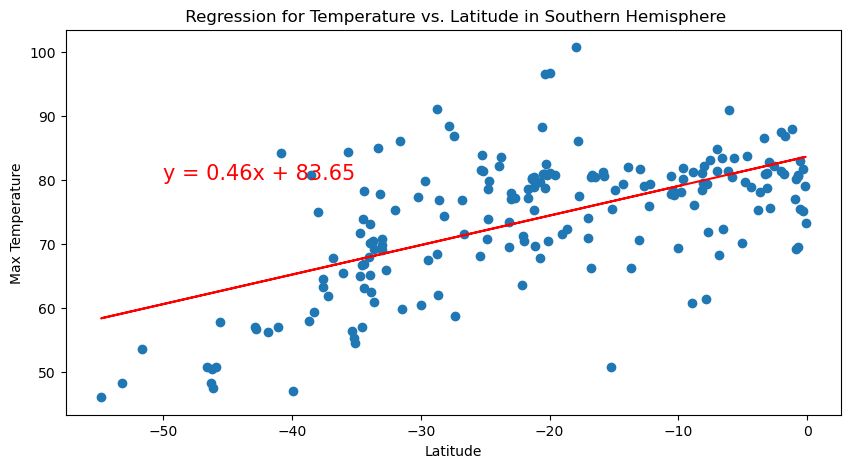

Analysis:The regression plot shows the temperatures increase as we approach the equator and there is a weak correlation between temperature and latitude in Southern Hemisphere


In [34]:
# Linear regression on Southern Hemisphere
x_axis_6 = southern_hemi_df["Lat"]
y_axis_6 = southern_hemi_df["Max Temp"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_6, y_axis_6)
regress_values = x_axis_6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_6,y_axis_6)

# Plot regression line
plt.plot(x_axis_6,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Temperature vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The regression plot shows the temperatures increase as we approach the equator and there is a weak correlation between temperature and latitude in Southern Hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.13578554385215827


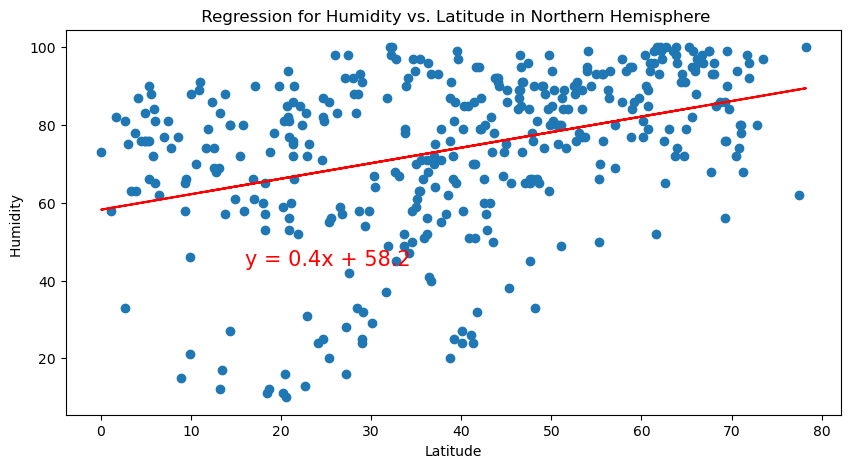

Analysis:The plot does not show correlation between humidity and latitude


In [36]:
x_axis_7 = northern_hemi_df["Lat"]
y_axis_7 = northern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_7, y_axis_7)
regress_values = x_axis_7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_7,y_axis_7)

# Plot regression line
plt.plot(x_axis_7,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Humidity vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Humidity ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The plot does not show correlation between humidity and latitude in the northern hemisphere")

The r-squared is: 0.031936252996803


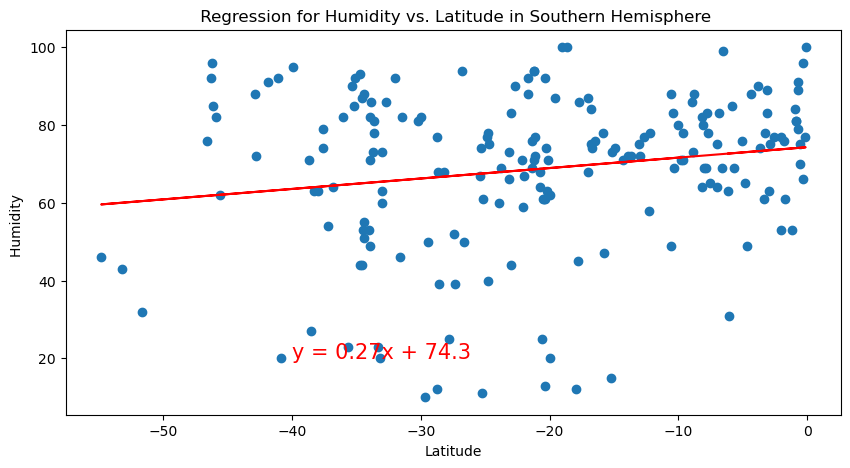

Analysis:The plot does not show correlation between humidity and latitude in the southern hemisphere


In [42]:
x_axis_8 = southern_hemi_df["Lat"]
y_axis_8 = southern_hemi_df["Humidity"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_8, y_axis_8)
regress_values = x_axis_8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_8,y_axis_8)

# Plot regression line
plt.plot(x_axis_8,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Humidity vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Humidity ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The plot does not show correlation between humidity and latitude in the southern hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.025562690922095017


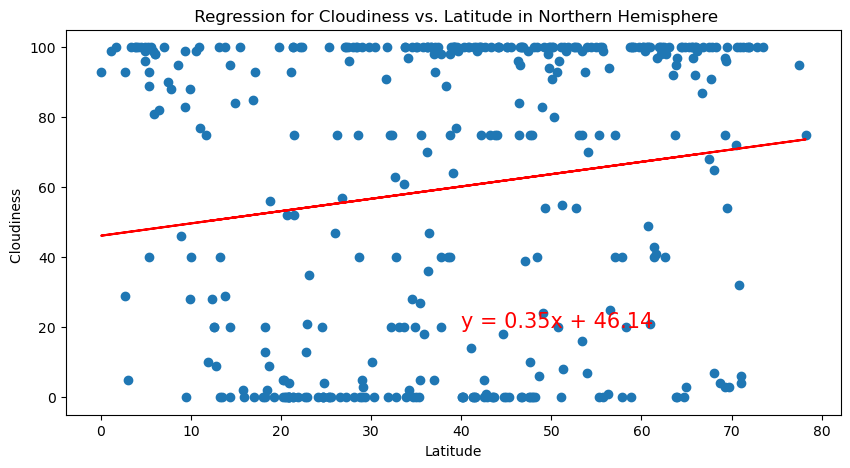

Analysis:The plot does not show correlation between humidity and latitude in the northern hemisphere


In [38]:
# Northern Hemisphere
x_axis_9 = northern_hemi_df["Lat"]
y_axis_9 = northern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_9, y_axis_9)
regress_values = x_axis_9 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_9,y_axis_9)

# Plot regression line
plt.plot(x_axis_9,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Cloudiness vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The plot does not show correlation between cloudiness and latitude in the northern hemisphere")

The r-squared is: 0.14030127920360863


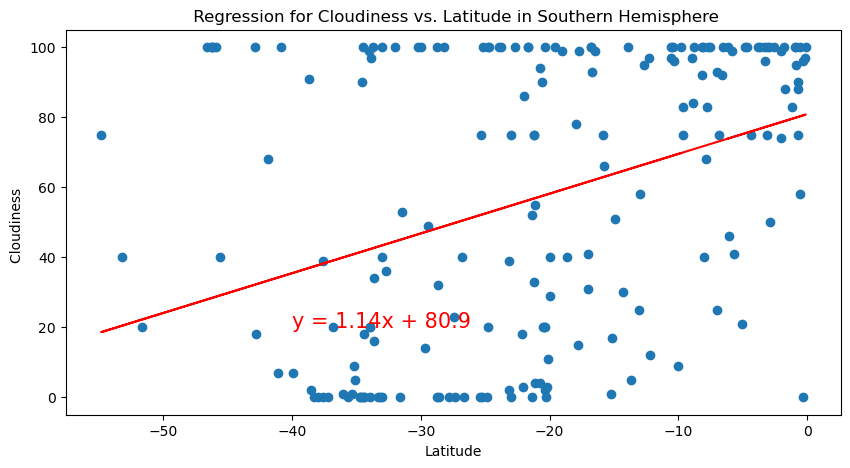

Analysis:The plot does not show correlation between humidity and latitude in the southern hemisphere


In [39]:
# Southern Hemisphere
x_axis_10 = southern_hemi_df["Lat"]
y_axis_10 = southern_hemi_df["Cloudiness"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_10, y_axis_10)
regress_values = x_axis_10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_10,y_axis_10)

# Plot regression line
plt.plot(x_axis_10,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Cloudiness vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The plot does not show correlation between cloudiness and latitude in the southern hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0204003104103881


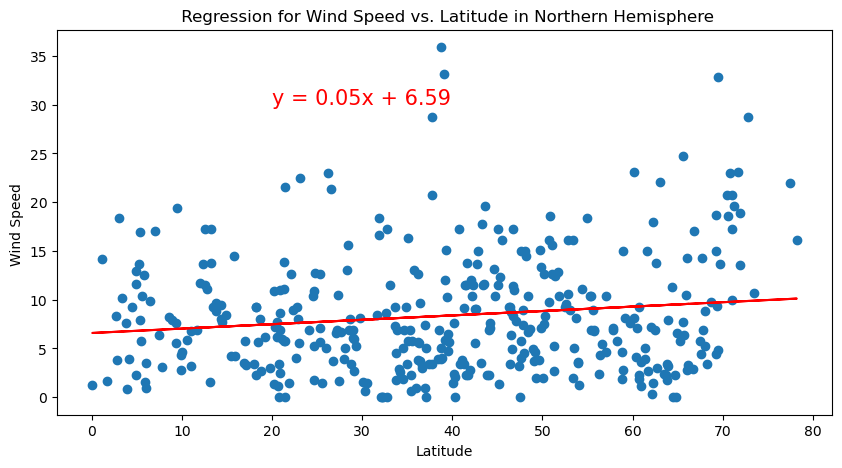

Analysis:The plot does not show correlation between humidity and latitude in the northern hemisphere


In [40]:
# Northern Hemisphere
x_axis_11 = northern_hemi_df["Lat"]
y_axis_11 = northern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_11, y_axis_11)
regress_values = x_axis_11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_11,y_axis_11)

# Plot regression line
plt.plot(x_axis_11,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Wind Speed vs. Latitude in Northern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The plot does not show correlation between wind speed and latitude in the northern hemisphere")

The r-squared is: 0.04575146703150146


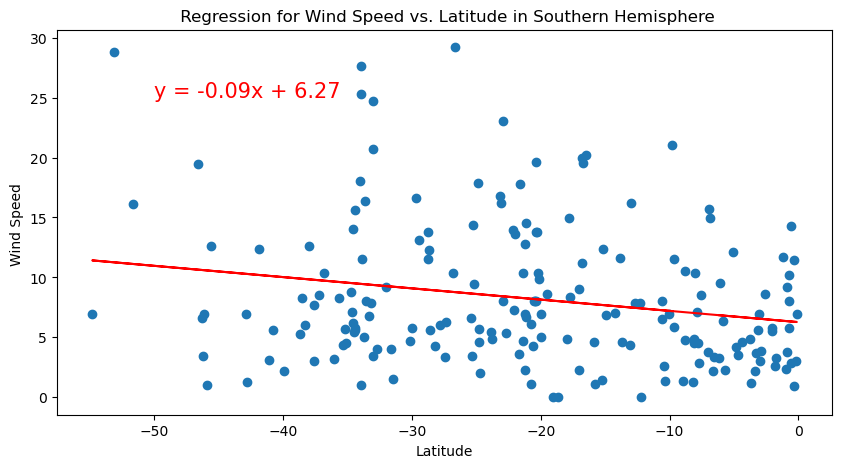

Analysis:The plot does not show correlation between humidity and latitude in the southern hemisphere


In [41]:
# Southern Hemisphere
x_axis_12 = southern_hemi_df["Lat"]
y_axis_12 = southern_hemi_df["Wind Speed"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_12, y_axis_12)
regress_values = x_axis_12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_axis_12,y_axis_12)

# Plot regression line
plt.plot(x_axis_12,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="r")

# Label plot
plt.title(' Regression for Wind Speed vs. Latitude in Southern Hemisphere',fontsize = 12)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed ")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

print(f"Analysis:The plot does not show correlation between wind speed and latitude in the southern hemisphere")

**Discussion about the linear relationship:** YOUR RESPONSE HERE